# Death Rates in Greece over the years

Below is a visualization of mortality rates and percentage change in mortality rates in Greece between 2000 and 2020. Its purpose is to demonstrate how changing the statistical unit—examining relative changes versus raw rates—can reveal additional patterns in datasets.
The data is sourced by the WHO Mortality Database.

In [2]:
# Import the libraries Ill be working with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import OrderedDict
import textwrap 
import glob
import os

In [3]:
# Get path in order to import my data
path = os.getcwd()
print(path)

c:\Users\anton\Desktop\WHO


In [4]:
# Create a list of paths of the datafiles
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(csv_files)

['c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Alzheimer and other dementias_12th February 2025 10_35.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Cerebrovascular disease_12th February 2025 10_35.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Chronic obstructive pulmonary disease_12th February 2025 12_46.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Diabetes mellitus_12th February 2025 10_38.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Injuries_12th February 2025 10_33.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Ischaemic heart disease_12th February 2025 12_47.csv', 'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Malignant neoplasms_12th February 2025 1

In [5]:
# Check what the paths look like
csv_files[0]

'c:\\Users\\anton\\Desktop\\WHO\\WHOMortalityDatabase_Trends_years_sex_a_country_area_age-Alzheimer and other dementias_12th February 2025 10_35.csv'

In [6]:
# Normalize csv file titles for easier use
csv_files[7][84:-29].replace(" ", "_").lower()

'respiratory_infections'

In [7]:
# Create a dictionary to store df titles and content
df_dict = {}

In [8]:
# Populate the dictionary
for csv_file in csv_files:
    df_name = csv_file[84:-29].replace(" ", "_").lower()
    df_dict[df_name] = pd.read_csv(csv_file, skiprows=6, index_col=False)

In [9]:
# Check dict keys
df_dict.keys()

dict_keys(['alzheimer_and_other_dementias', 'cerebrovascular_disease', 'chronic_obstructive_pulmonary_disease', 'diabetes_mellitus', 'injuries', 'ischaemic_heart_disease', 'malignant_neoplasms', 'respiratory_infections'])

In [10]:
# Initialize an empty DataFrame to store the combined results
combined_df = pd.DataFrame()  

for df_name, df in df_dict.items():
    # Keep only the 'Year' and 'Death rate per 100 000 population' columns
    df_filtered = df[['Year', 'Death rate per 100 000 population']]
    
    # Rename the 'Death rate per 100 000 population' column to the name of the DataFrame
    df_filtered = df_filtered.rename(columns={'Death rate per 100 000 population': df_name.replace("_", " ").title()})
    
    # Merge the filtered DataFrame into the combined DataFrame
    if combined_df.empty:
        combined_df = df_filtered
    else:
        combined_df = pd.merge(combined_df, df_filtered, on='Year', how='outer')

combined_df.rename(columns={"Alzheimer And Other Dementias": "Alzheimer and Other Dementias"}, inplace=True)

# Display the combined DataFrame
combined_df.head()

,Year,Alzheimer and Other Dementias,Cerebrovascular Disease,Chronic Obstructive Pulmonary Disease,Diabetes Mellitus,Injuries,Ischaemic Heart Disease,Malignant Neoplasms,Respiratory Infections
0,2000,6.860572,171.770770,13.382237,7.684940,41.181751,118.250981,217.660578,26.755315
1,2001,7.031994,169.297530,14.127915,6.392722,40.182821,119.763071,222.850272,23.214712
2,2002,6.534663,169.518999,12.250219,7.381075,36.341102,119.962951,221.887318,25.601683
3,2003,6.513339,167.532511,10.613658,7.756135,36.657942,127.608828,224.873480,29.128595
4,2004,7.051335,159.098008,10.495641,9.157695,37.489598,125.703608,229.963925,30.628107


I'll first plot the data in absolute values (deaths) over time. I'll use the same scale (shared Y-axis), because a) it makes it easy to compare magnitudes across causes of death b) it highlights which causes have significantly higher or lower rates and c) prevents misleading visual exaggeration of trends.

In [ ]:
# Convert the dataframe to long format, which will be easier to visualize
df_melted = combined_df.melt(id_vars=["Year"], var_name="Cause", value_name="Rate")

In [12]:
df_melted.head()

,Year,Cause,Rate
0,2000,Alzheimer and Other Dementias,6.860572
1,2001,Alzheimer and Other Dementias,7.031994
2,2002,Alzheimer and Other Dementias,6.534663
3,2003,Alzheimer and Other Dementias,6.513339
4,2004,Alzheimer and Other Dementias,7.051335


The first chart will show the mortality rates in Greece between 2000 and 2020, measured per 100,000 people.

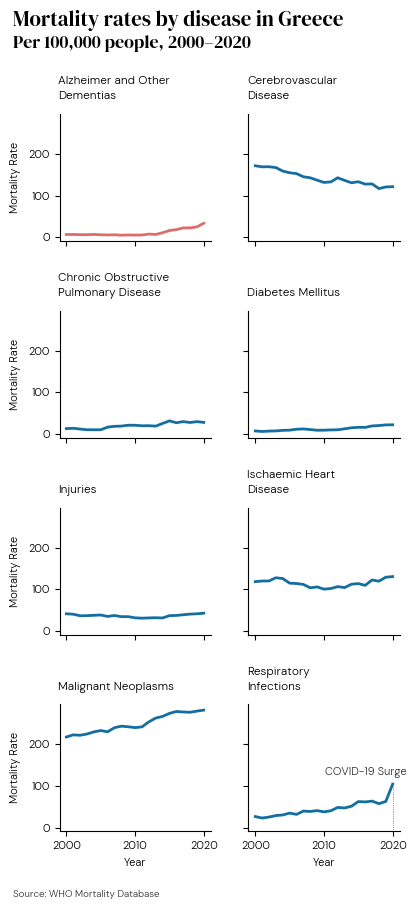

In [ ]:
# Load fonts from (my local) files
dm_sans_path_light = r"C:\Windows\Fonts\DMSans-Light.ttf"
dm_sans_path_semibold = r"C:\Windows\Fonts\DMSans-Light.ttf"  
dm_serif_display_path = r"C:\Windows\Fonts\DMSerifDisplay-Regular.ttf"

# Create FontProperties objects
dm_sans_font_light = fm.FontProperties(fname=dm_sans_path_light)
dm_sans_font_semibold = fm.FontProperties(fname=dm_sans_path_semibold)
dm_serif_display_font = fm.FontProperties(fname=dm_serif_display_path)

main_font_size = 8

# Function to wrap text for facet titles
def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(text, width))

# Set up the figure
g = sns.FacetGrid(df_melted, col="Cause", col_wrap=2, sharey=True, height=2, aspect=1)

# Loop through each subplot and conditionally assign colors
for i, (ax, cause) in enumerate(zip(g.axes.flat, df_melted["Cause"].unique())):
    subset = df_melted[df_melted["Cause"] == cause]
    # I want the first plot to have different line color than the rest, to highlight its content
    color = "#dd6d6d" if i == 0 else "#146ea0"  
    sns.lineplot(data=subset, x="Year", y="Rate", ax=ax, color=color, linewidth=2)

    # Axis labels 
    ax.set_xlabel("Year", fontproperties=dm_sans_font_light, fontsize=main_font_size)
    ax.set_ylabel("Mortality Rate", fontproperties=dm_sans_font_light, fontsize=main_font_size)

    ax.yaxis.set_label_coords(-0.255, 0.5)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(dm_sans_font_light)
        label.set_fontsize(main_font_size)

    # I want to highlight the COVID-19 surge only in this category
    if cause == "Respiratory Infections":  
        ax.axvline(x=2020, ymax=.365, color='#303234', linestyle=':', linewidth=0.5)
        ax.text(2022, ax.get_ylim()[1] * 0.425, "COVID-19 Surge", color="#303234", fontsize=main_font_size, font=dm_sans_font_light, horizontalalignment ='right')

# Wrap facet plot titles
wrapped_titles = [wrap_text(cause) for cause in df_melted["Cause"].unique()]
g.set_titles(col_template="{col_name}")

# Manually adjust facet titles with dynamic vertical alignment
for ax, wrapped_title in zip(g.axes.flat, wrapped_titles):
    # Count the number of lines
    num_lines = wrapped_title.count("\n") + 1  

    # Adjust `y` position dynamically
    y_pos = 1.05 if num_lines == 1 else 1.05  

    ax.set_title(
        wrapped_title, 
        fontproperties=dm_sans_font_semibold, 
        fontsize=8.5,
        fontweight=100,
        ha='left',
        linespacing=1.5,  
        x =-0.01,
        y=y_pos  
    )

# Add main title
plt.suptitle(
    "Mortality rates by disease in Greece",  
    fontsize=15,
    fontproperties=dm_serif_display_font, 
    x=0.0335, 
    y=1.075, 
    horizontalalignment='left'
)

# Add a subtitle below the title 
plt.figtext(
    0.0335, 1.044, 
    "Per 100,000 people, 2000–2020",      
    fontsize=13, 
    fontproperties=dm_serif_display_font,
    ha="left", 
    va="top"
)

plt.figtext(
    0.0335, -0.025, 
    "Source: WHO Mortality Database",      
    fontsize=7,
    color="#303234",
    fontproperties=dm_sans_font_light,
    ha="left", 
    va="top"
)

plt.xticks(rotation=0)
g.figure.subplots_adjust(wspace=.25, hspace=.55, right=1, left=0.15, top=.945)  
plt.savefig("mortality_rates.png", dpi=300, bbox_inches="tight")
plt.show()  


To now show the trends in the small multiples, I'll plot percentage change from the first year as a baseline, instead of showing absolute values:

In [126]:
# Compute percentage change relative to the first year for each cause
df_melted["Pct_Change"] = df_melted.groupby("Cause")["Rate"].transform(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100)

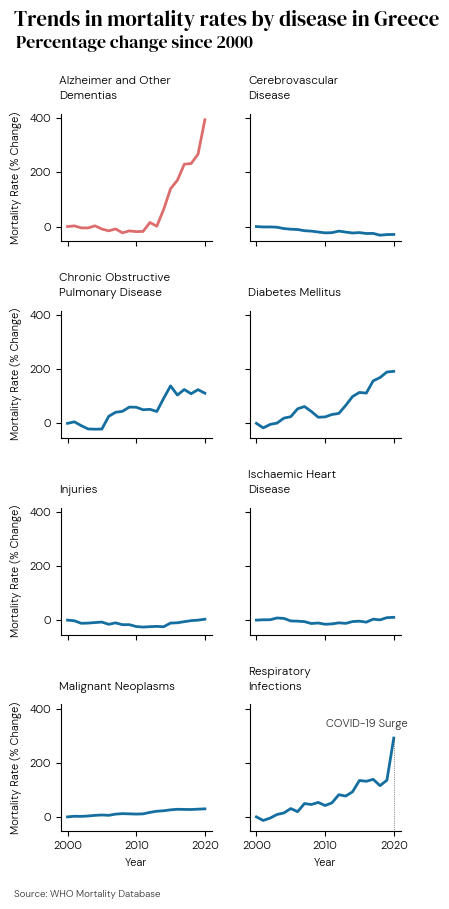

In [ ]:
# Plot small multiples
g = sns.FacetGrid(df_melted, col="Cause", col_wrap=2, sharey=True, height=2, aspect=1)

# Loop through each subplot and conditionally assign colors
for i, (ax, cause) in enumerate(zip(g.axes.flat, df_melted["Cause"].unique())):
    subset = df_melted[df_melted["Cause"] == cause]
    # Different colors for the first chart, same as before
    color = "#dd6d6d" if i == 0 else "#146ea0"  
    sns.lineplot(data=subset, x="Year", y="Pct_Change", ax=ax, color=color, linewidth=2)

    # Axis labels
    ax.set_xlabel("Year", fontproperties=dm_sans_font_light, fontsize=main_font_size)
    ax.set_ylabel("Mortality Rate (% Change)", fontproperties=dm_sans_font_light, fontsize=main_font_size)

    ax.yaxis.set_label_coords(-0.255, 0.5)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(dm_sans_font_light)
        label.set_fontsize(main_font_size)

    # Apply only to this category
    if cause == "Respiratory Infections":  
        ax.axvline(x=2020, ymax=.735, color='#303234', linestyle=':', linewidth=0.5)
        # Add text near the vertical line
        ax.text(2022, ax.get_ylim()[1] * 0.795, "COVID-19 Surge", color="#303234", fontsize=main_font_size, font=dm_sans_font_light, horizontalalignment ='right')

# Wrap facet plot titles
wrapped_titles = [wrap_text(cause) for cause in df_melted["Cause"].unique()]
g.set_titles(col_template="{col_name}")

# Manually adjust facet titles with dynamic vertical alignment
for ax, wrapped_title in zip(g.axes.flat, wrapped_titles):
    # Count the number of lines
    num_lines = wrapped_title.count("\n") + 1  

    # Adjust `y` position dynamically
    y_pos = 1.05 if num_lines == 1 else 1.05 

    ax.set_title(
        wrapped_title, 
        fontproperties=dm_sans_font_semibold, 
        fontsize=8.5,
        fontweight=100,
        ha='left',
        linespacing=1.5,  
        x =-0.01,
        y=y_pos  
    )

# Add main title
plt.suptitle(
    "Trends in mortality rates by disease in Greece",  
    fontsize=15,
    fontproperties=dm_serif_display_font, 
    x=0.0335, 
    y=1.075, 
    horizontalalignment='left'
)

# Add a subtitle below the title 
plt.figtext(
    0.0385, 1.044, 
    "Percentage change since 2000",      
    fontsize=13,
    fontproperties=dm_serif_display_font,
    ha="left", 
    va="top"
)

plt.figtext(
    0.0335, -0.025, 
    "Source: WHO Mortality Database",
    fontsize=7,
    color="#303234",
    fontproperties=dm_sans_font_light,
    ha="left", 
    va="top"
)

plt.xticks(rotation=0)
g.figure.subplots_adjust(wspace=.25, hspace=.55, right=1, left=0.15, top=.945)  
plt.savefig("mortality_rates_trends.png", dpi=300, bbox_inches="tight")
plt.show() 
